<a href="https://colab.research.google.com/github/SHIWANGIKU/Machine-Learning/blob/master/GUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os


In [17]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np

In [10]:
!pip install -q streamlit

In [37]:
%%writefile app.py

Writing app.py


In [11]:
import streamlit as st
import numpy as np
from PIL import Image
import tensorflow as tf
import cv2

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
from keras import models

In [18]:
loded_model = load_model("/content/AlexNet_500Epochs.h5")

In [19]:
loded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       46592     
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 256)       819456    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 256)       590080    
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 256)      

In [20]:
from google.colab import files

In [21]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
# EPOCHS=100

images_dataset=tf.keras.preprocessing.image_dataset_from_directory(
 '/content/drive/MyDrive/thyroid/test',
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE,
)

Found 31 files belonging to 2 classes.


In [22]:
class_names=images_dataset.class_names
class_names

['benign', 'malignant']

In [23]:
#exploring the dataset
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(31, 256, 256, 3)
[0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1]


In [24]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size= int(train_split* ds_size)
    val_size=int(val_split* ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)

    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [25]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(images_dataset)

In [26]:
print(len(train_ds),len(val_ds),len(test_ds))

0 0 1


In [27]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [28]:
#Write a function for interference

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [29]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 68ms/step


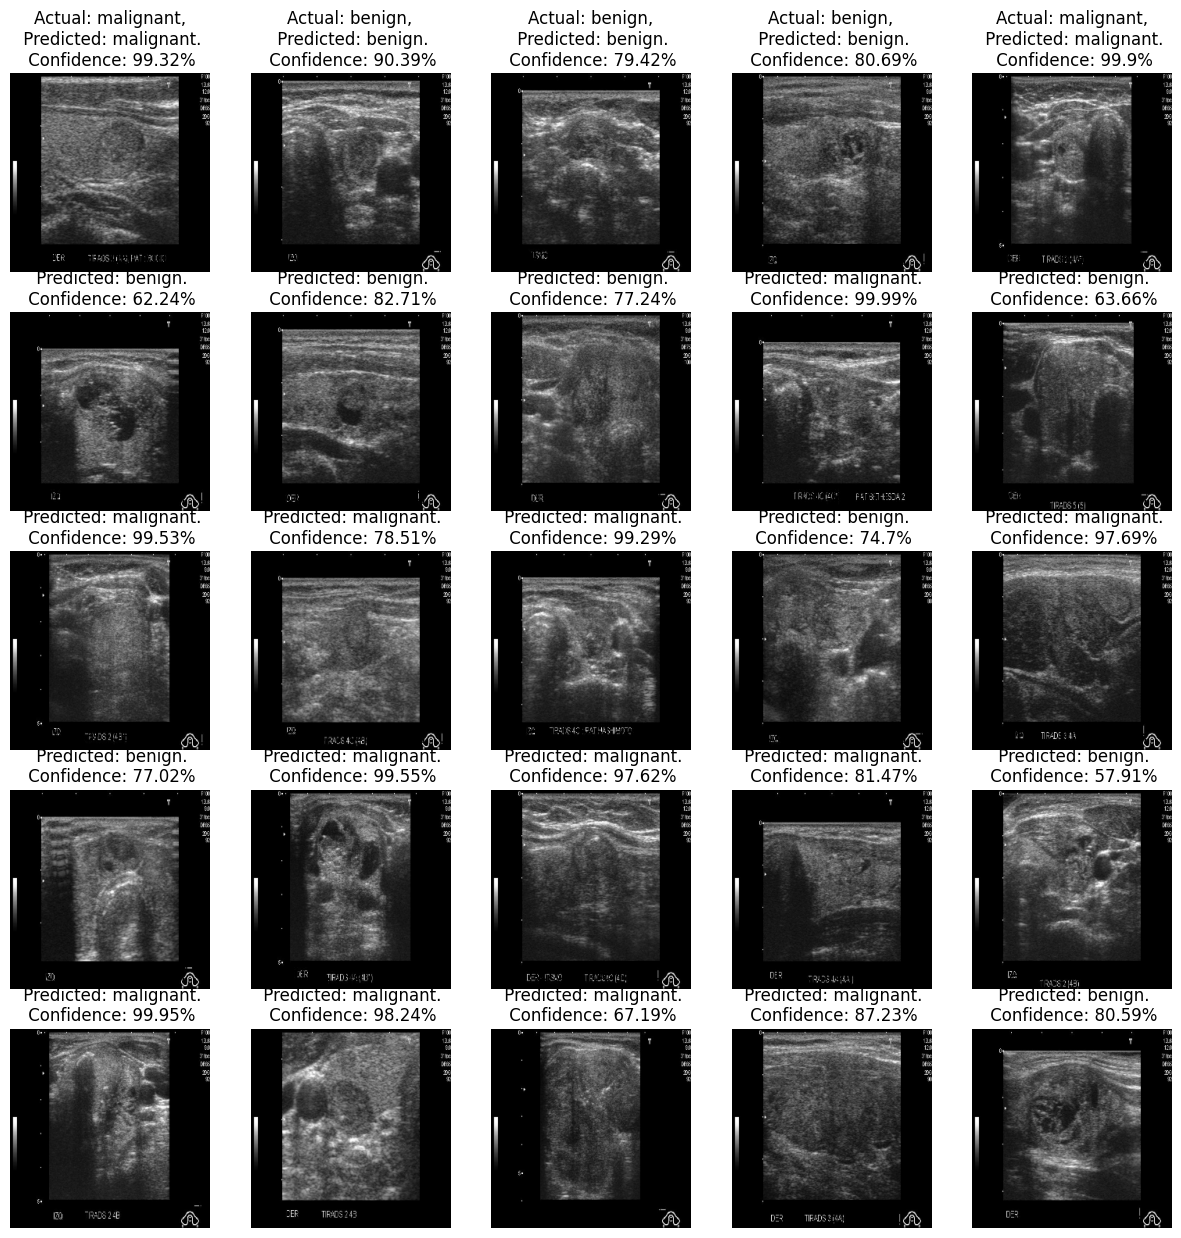

In [30]:
# Now run inference on few sample images
pred = []
act = []
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(loded_model, images[i].numpy())
        actual_class = class_names[labels[i]]

        pred.append(predicted_class)
        act.append(actual_class)

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(act,pred)

In [32]:
tn,fp,fn,tp = cm.ravel()

In [33]:
print(tp,fn,tn,fp)

13 2 9 1


In [34]:
cm

array([[ 9,  1],
       [ 2, 13]])

In [38]:
# Streamlit app
st.title('Thyroid Malignancy Detection')
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.074s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [36]:
streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
DeltaGenerator()

SyntaxError: ignored

In [ ]:
st.subheader('Hybrid model Detection')
uploaded_image_thyroid = st.file_uploader('Upload an image of a thyroid', type=['jpg', 'jpeg', 'png'])

In [ ]:
if uploaded_image_thyroid is not None:
    image = Image.open(uploaded_image_thyroid)
    st.image(image, caption='Uploaded Image (Thyroid)', use_column_width=True)

In [ ]:
# Make predictions for Malignancy
    prediction_Malignancy = predict_malignancy(np.array(image))
    disease_class_Malignancy = np.argmax(prediction_Malignancy)
    classes_Malignancy = ['Malignancy___Benign', 'Malignancy___Malignant']
    st.write(f'Predicted class (Malignancy): {classes_Malignancy[disease_class_Malignancy]}')

    st.write('Class probabilities (Malignancy):')
    for i, class_name in enumerate(classes_Malignancy):
        st.write(f'{class_name}: {prediction_Malignancy[0][i]:.4f}')